## Essential Python Libraries for Data Analysis

**Purpose:** 
Import all necessary tools for loading, analyzing, and modeling diabetes data.

**Key Imports:**
- **Data Handling**: `pandas` (DataFrames), `numpy` (numerical operations)
- **Visualization**: `matplotlib` (basic plots), `seaborn` (statistical charts)
- **Machine Learning**: `scikit-learn` (algorithms, preprocessing, evaluation)

**Why These Matter:**
Foundation for entire project - enables data loading, cleaning, visualization, model training, and performance evaluation.

In [2]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model selection and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## Loading and Initial Exploration of Diabetes Dataset

**Purpose:**  
Load the diabetes dataset and examine the first 20 rows to understand its structure and content.

**What This Code Does:**
1. `pd.read_csv('diabetes.csv')` - Reads the CSV file into a pandas DataFrame
2. `data.head(20)` - Displays the first 20 rows of the dataset

**Key Information Revealed:**
- Dataset contains 768 patient records with 9 columns
- Features include: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age
- Target variable: Outcome (0 = Non-Diabetic, 1 = Diabetic)
- Initial view helps identify data types, missing values, and basic patterns

**Why This Matters:**  
First step in any data analysis - understanding what data you're working with before proceeding to cleaning and modeling.

In [50]:
data = pd.read_csv('diabetes.csv')
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## Initial Data Exploration and Statistics

**Purpose:**  
Perform comprehensive initial analysis of the diabetes dataset to understand its structure, content, and basic statistics.

**What This Code Does:**

**1. Dataset Overview**
- `data.shape` - Shows dimensions (768 rows × 9 columns)
- `data.columns` - Lists all feature names
- `data.head(10)` - Displays first 10 patient records

**2. Dataset Information**
- `data.info()` - Reveals data types, non-null counts, and memory usage
- Shows each column's data type (int64, float64)
- Confirms no missing values in original dataset

**3. Statistical Summary**
- `data.describe().T` - Transposed summary statistics
- Shows count, mean, std, min, quartiles, max for each feature
- Reveals potential data quality issues (zeros in biological measurements)

**Key Insights Gained:**
- 768 samples with 8 features + 1 target variable
- Features are numerical (integers and floats)
- Target variable is binary (0/1)
- Statistical ranges help identify outliers and scaling needs

In [27]:
# Data Initial Visualization
print(f"Dataset shape: {data.shape}")
print(f"Dataset columns: {list(data.columns)}")

# Display first few rows
print("\nFirst 10 rows of the dataset:")
display(data.head(10))


# Dataset Information
print("=" * 60)
print("DATASET INFORMATION")
print("=" * 60)
data.info()


# Basic Statistics
print("=" * 60)
print("BASIC STATISTICAL SUMMARY")
print("=" * 60)
display(data.describe().T)

Dataset shape: (768, 9)
Dataset columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

First 10 rows of the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,29.0,125.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,29.0,125.0,32.3,0.232,54,1


DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB
BASIC STATISTICAL SUMMARY


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.0000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Target Variable Distribution Analysis

**Purpose:** Visualize class distribution between diabetic and non-diabetic patients

**Visualization:** Bar chart showing count of each outcome category

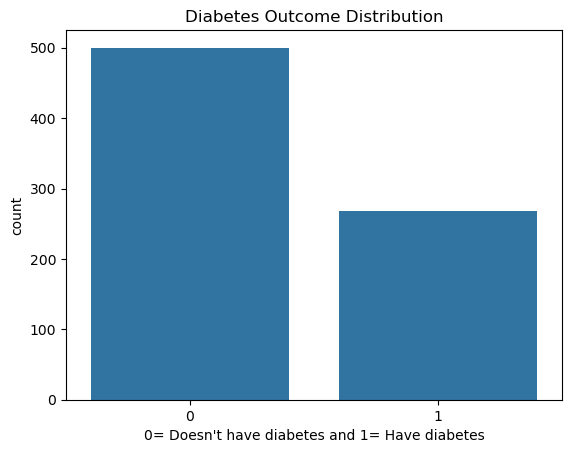

In [28]:
sns.countplot(x='Outcome', data=data)
plt.title("Diabetes Outcome Distribution")
plt.xlabel("0= Doesn't have diabetes and 1= Have diabetes")
plt.show()

## Data Cleaning and Missing Value Imputation

**Purpose:** Handle biologically impossible zero values by replacing them with appropriate median values

**Process:** Identify medical measurements where zero is invalid, replace with NaN, then impute with column medians

In [8]:
# Columns where zero is not a valid value
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0 with NaN
data[cols_with_zero] = data[cols_with_zero].replace(0, np.nan)

# Fill missing values with median
data.fillna(data.median(), inplace=True)

### Data Exploration and Summary after preprocessing

This cell performs initial data exploration by:
1. Displaying dataset structure and data types using `data.info()`
2. Generating descriptive statistics for numerical columns using `data.describe()`

In [31]:
# Dataset information
data.info()

# Statistical summary
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Diabetes Status Distribution Visualization

This cell creates a pie chart visualization to display the proportion of diabetic versus non-diabetic cases in the dataset. The chart is generated using matplotlib's `plt.pie()` function and includes:
1. Count calculation for both outcome categories
2. Pie chart with exploded slices, percentage labels, and color coding
3. Statistical summary displaying the exact record counts

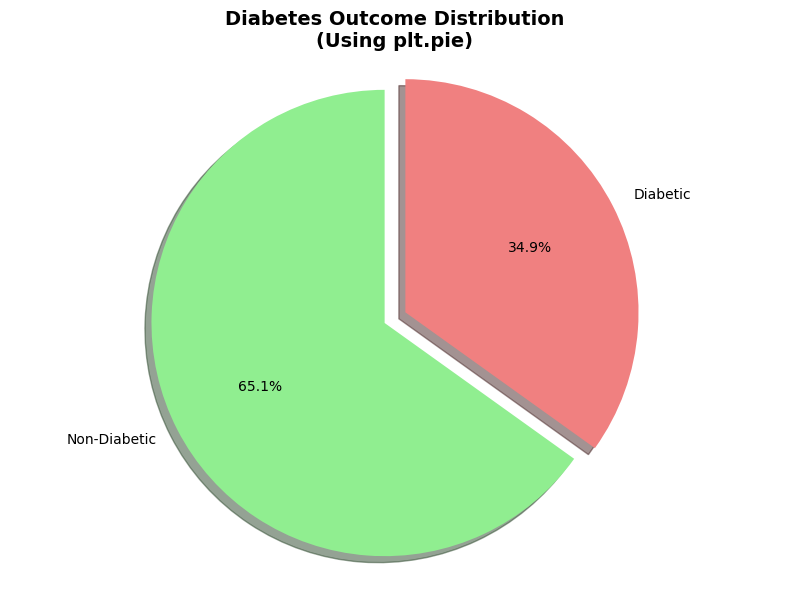

Total records: 768
Non-Diabetic (0): 500
Diabetic (1): 268


In [35]:
# Diabetes Status Distribution Pie Chart
# Simple visualization using plt.pie to show diabetic vs non-diabetic proportions

# Get counts from dataset
non_diabetic_count = (data['Outcome'] == 0).sum()
diabetic_count = (data['Outcome'] == 1).sum()
total = len(data)

# Data for pie chart
labels = ['Non-Diabetic', 'Diabetic']
sizes = [non_diabetic_count, diabetic_count]
colors = ['lightgreen', 'lightcoral']
explode = (0.05, 0.05)  # Explode both slices slightly

# Create pie chart using plt.pie
plt.figure(figsize=(8, 6))
plt.pie(sizes, 
        labels=labels, 
        colors=colors,
        explode=explode,
        autopct='%1.1f%%',
        startangle=90,
        shadow=True)

plt.title('Diabetes Outcome Distribution\n(Using plt.pie)', fontsize=14, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
plt.tight_layout()
plt.show()

# Display counts
print(f"Total records: {total}")
print(f"Non-Diabetic (0): {non_diabetic_count}")
print(f"Diabetic (1): {diabetic_count}")

# LOGISTIC REGRESSION MODEL IMPLEMENTATION

### Data Preparation and Model Initialization

This cell prepares the data for machine learning by:
1. Separating features (X) from the target variable (y)
2. Splitting data into training and testing sets with an 80/20 ratio
3. Scaling features using StandardScaler for normalization
4. Initializing a Logistic Regression model for binary classification

In [56]:
# Features (X) and target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize model
log_model = LogisticRegression()

### Feature Visualization Before Prediction

This cell creates a comprehensive visualization of all features against the diabetes outcome before model training. It generates a 2x4 grid of scatter plots displaying:
1. Individual relationships between each feature and the binary outcome (0=Non-Diabetic, 1=Diabetic)
2. Distinct markers for training (blue +) and testing (red o) data points
3. Feature-wise visualization to understand data distribution and potential patterns

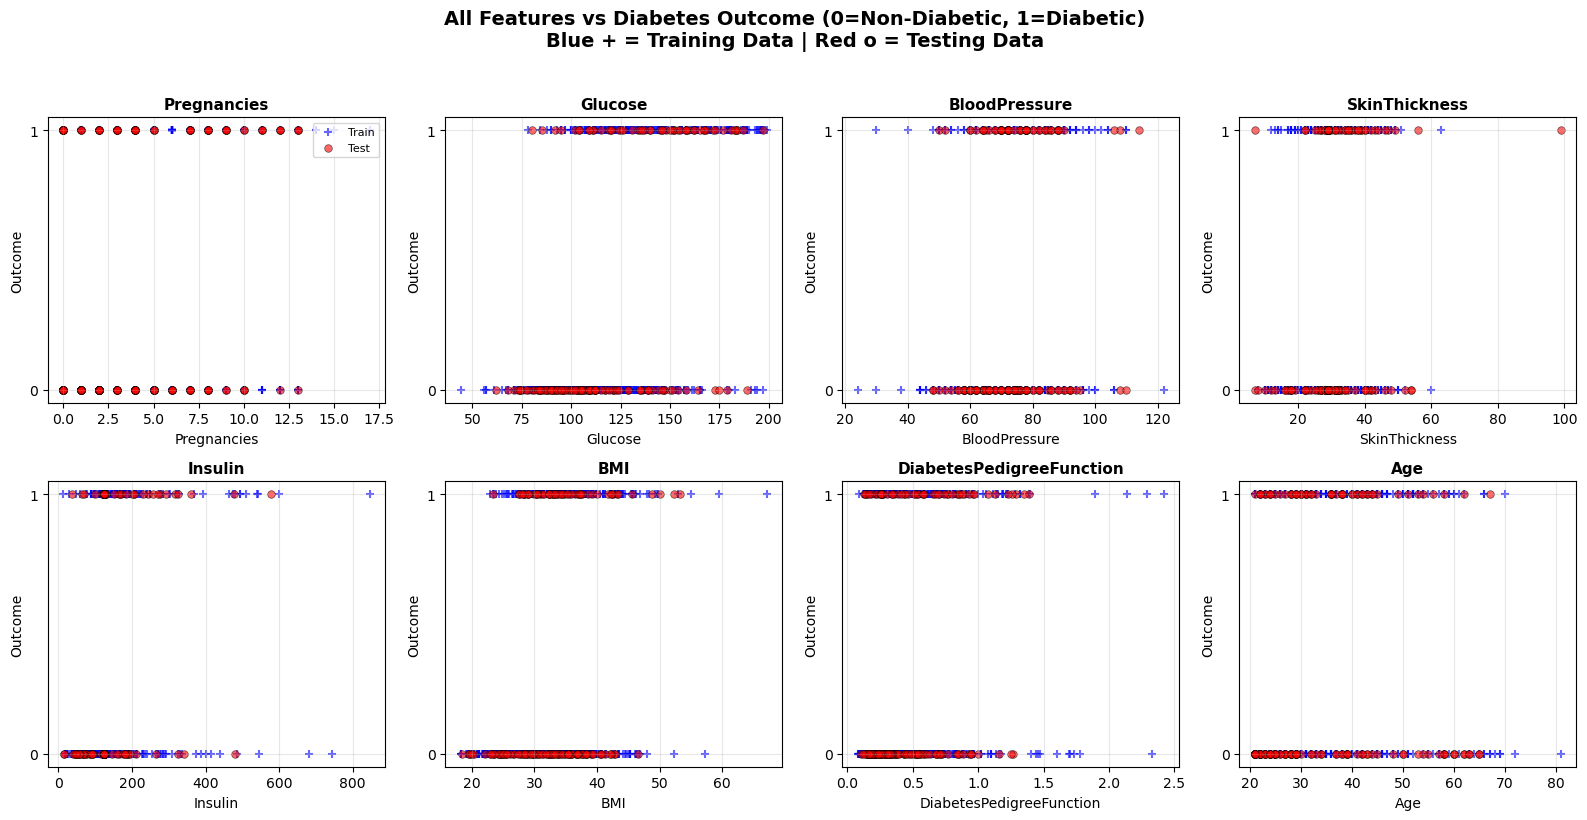

In [41]:
# Plot each feature

# Create figure with subplots for all features
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

# Get all feature names
feature_names = X_train.columns.tolist()

for i, feature in enumerate(feature_names):
    # Plot training data
    axes[i].scatter(X_train[feature], y_train, 
                    marker='+', 
                    color='blue',
                    s=40,
                    alpha=0.6,
                    label='Train')
    
    # Plot testing data
    axes[i].scatter(X_test[feature], y_test, 
                    marker='o', 
                    color='red',
                    s=30,
                    alpha=0.6,
                    label='Test',
                    edgecolors='black',
                    linewidth=0.5)
    
    # Customize each subplot
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel('Outcome', fontsize=10)
    axes[i].set_title(feature, fontsize=11, fontweight='bold')
    axes[i].grid(True, alpha=0.3)
    axes[i].set_yticks([0, 1])
    axes[i].set_yticklabels(['0', '1'])
    
    # Add legend only for first subplot
    if i == 0:
        axes[i].legend(loc='upper right', fontsize=8)


# Add overall title
plt.suptitle('All Features vs Diabetes Outcome (0=Non-Diabetic, 1=Diabetic)\nBlue + = Training Data | Red o = Testing Data', 
             fontsize=14, fontweight='bold', y=1.02)

# Adjust layout
plt.tight_layout()
plt.show()

### Model Training and Evaluation

This cell trains and evaluates the Logistic Regression model by:
1. Fitting the model to the scaled training data
2. Making predictions on the scaled test data
3. Calculating and displaying the model's accuracy score

In [14]:
# Train model
log_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_log = log_model.predict(X_test_scaled)

# Accuracy
log_accuracy = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", log_accuracy)

Logistic Regression Accuracy: 0.7532467532467533


# RANDOM FOREST MODEL IMPLEMENTATION

This cell initializes a Random Forest Classifier with the following hyperparameters:
1. 200 decision trees (n_estimators)
2. Maximum tree depth of 10
3. Fixed random state for reproducibility

In [15]:
# Initialize model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42)

### RANDOM FOREST FEATURE IMPORTANCE VISUALIZATION
This cell visualizes feature importance from the Random Forest model using a bar plot.

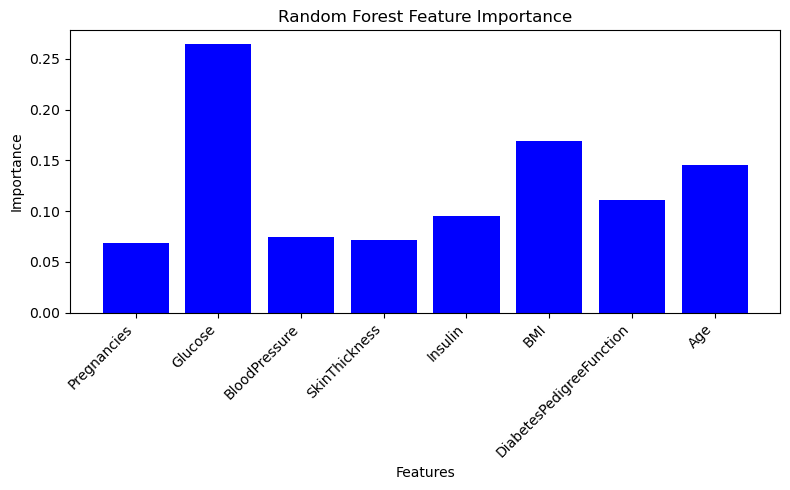

In [47]:
# # Random Forest Feature Importance
# Simple bar plot
plt.figure(figsize=(8, 5))

# Create bar plot
plt.bar(X.columns, rf_model.feature_importances_, color='blue')

# Add labels
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')

# Rotate x labels for readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### RANDOM FOREST MODEL TRAINING AND EVALUATION

This cell trains and evaluates the Random Forest model by:
1. Fitting the model to the training data
2. Making predictions on the test data
3. Calculating and displaying the model's accuracy score

In [16]:
# Train model
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.7467532467532467


### MODEL EVALUATION UTILITIES

This cell defines evaluation utilities including:
1. A confusion matrix visualization function that creates labeled heatmaps with numerical annotations
2. Generation of a comprehensive classification report displaying precision, recall, F1-scores, and accuracy metrics

In [17]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

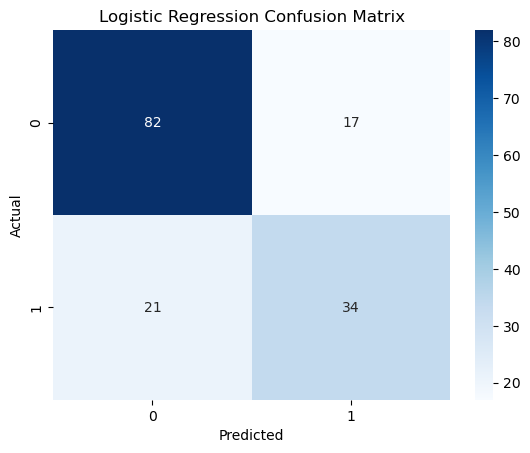

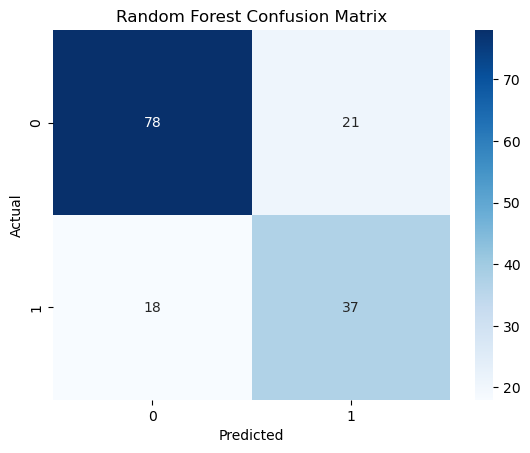

In [18]:
plot_confusion_matrix(y_test, y_pred_log, "Logistic Regression Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")

In [20]:
print("Logistic Regression Report:\n")
print(classification_report(y_test, y_pred_log))

Logistic Regression Report:

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



In [21]:
print("Random Forest Report:\n")
print(classification_report(y_test, y_pred_rf))

Random Forest Report:

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



### MODEL PERFORMANCE COMPARISON VISUALIZATION

This cell creates a bar chart visualization comparing the accuracy scores of both implemented models, displaying:
1. Side-by-side accuracy bars for Logistic Regression and Random Forest
2. Y-axis scaled from 0 to 1 for proper accuracy representation
3. Grid overlay and descriptive labels for clear model comparison

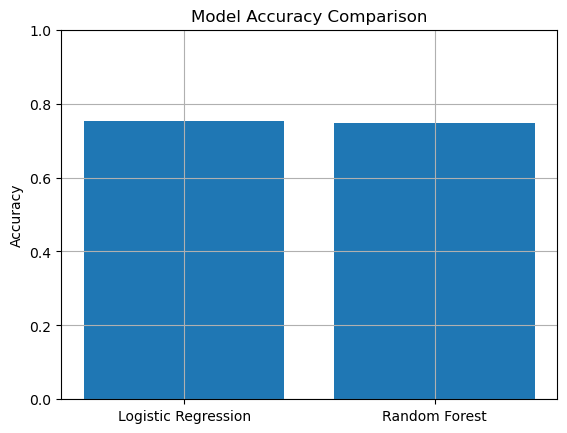

In [22]:
models = ['Logistic Regression', 'Random Forest']
accuracies = [log_accuracy, rf_accuracy]

plt.bar(models, accuracies)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.grid()
plt.show()

## Model Comparison by Precision and Recall

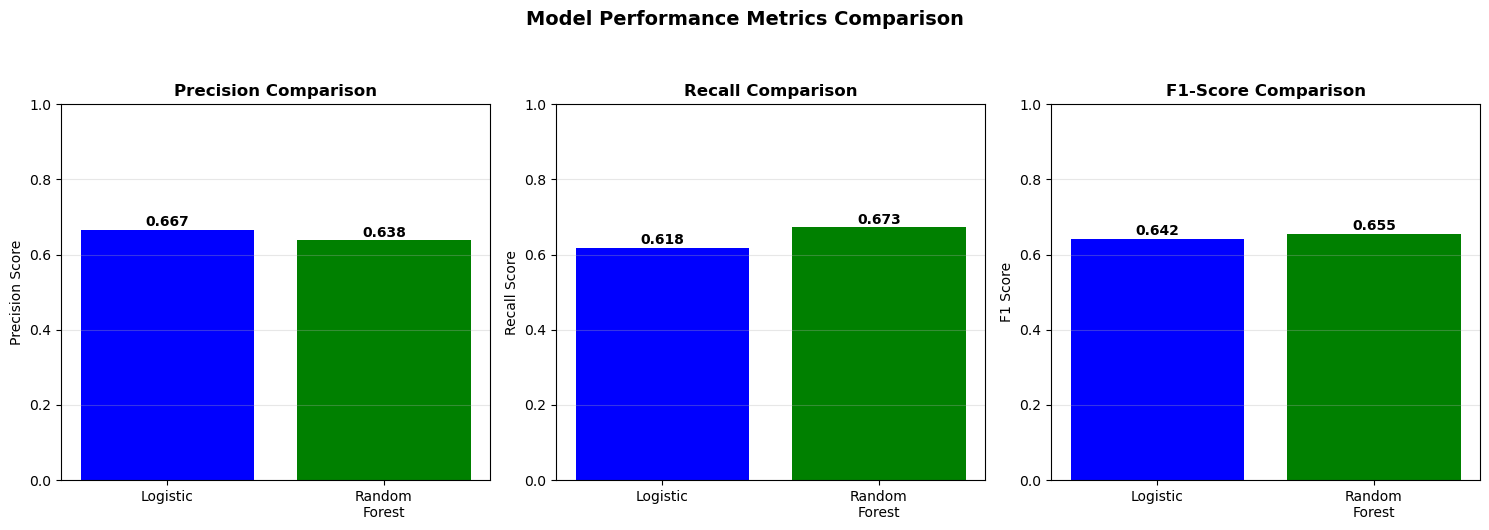

MODEL METRICS COMPARISON
Metric          Logistic     Random Forest  
------------------------------------------------------------
Accuracy              0.7532          0.7468
Precision             0.6667          0.6379
Recall                0.6182          0.6727
F1-Score              0.6415          0.6549


In [61]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate metrics
log_precision = precision_score(y_test, y_pred_log)
rf_precision = precision_score(y_test, y_pred_rf)

log_recall = recall_score(y_test, y_pred_log)
rf_recall = recall_score(y_test, y_pred_rf)

log_f1 = f1_score(y_test, y_pred_log)
rf_f1 = f1_score(y_test, y_pred_rf)

# Create plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1. Precision Comparison
axes[0].bar(['Logistic', 'Random\nForest'], 
            [log_precision, rf_precision], 
            color=['blue', 'green'])
axes[0].set_title('Precision Comparison', fontweight='bold')
axes[0].set_ylabel('Precision Score')
axes[0].set_ylim(0, 1)
axes[0].grid(axis='y', alpha=0.3)
for i, val in enumerate([log_precision, rf_precision]):
    axes[0].text(i, val + 0.01, f'{val:.3f}', ha='center', fontweight='bold')

# 2. Recall Comparison
axes[1].bar(['Logistic', 'Random\nForest'], 
            [log_recall, rf_recall], 
            color=['blue', 'green'])
axes[1].set_title('Recall Comparison', fontweight='bold')
axes[1].set_ylabel('Recall Score')
axes[1].set_ylim(0, 1)
axes[1].grid(axis='y', alpha=0.3)
for i, val in enumerate([log_recall, rf_recall]):
    axes[1].text(i, val + 0.01, f'{val:.3f}', ha='center', fontweight='bold')

# 3. F1-Score Comparison
axes[2].bar(['Logistic', 'Random\nForest'], 
            [log_f1, rf_f1], 
            color=['blue', 'green'])
axes[2].set_title('F1-Score Comparison', fontweight='bold')
axes[2].set_ylabel('F1 Score')
axes[2].set_ylim(0, 1)
axes[2].grid(axis='y', alpha=0.3)
for i, val in enumerate([log_f1, rf_f1]):
    axes[2].text(i, val + 0.01, f'{val:.3f}', ha='center', fontweight='bold')

plt.suptitle('Model Performance Metrics Comparison', fontsize=14, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

# Print comparison
print("=" * 60)
print("MODEL METRICS COMPARISON")
print("=" * 60)
print(f"{'Metric':15} {'Logistic':12} {'Random Forest':15}")
print("-" * 60)
print(f"{'Accuracy':15} {log_accuracy:12.4f} {rf_accuracy:15.4f}")
print(f"{'Precision':15} {log_precision:12.4f} {rf_precision:15.4f}")
print(f"{'Recall':15} {log_recall:12.4f} {rf_recall:15.4f}")
print(f"{'F1-Score':15} {log_f1:12.4f} {rf_f1:15.4f}")
print("=" * 60)

##  Model Persistence with Joblib

In [58]:
import joblib
import os

# Create directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Save Logistic Regression model
joblib.dump(log_model, 'models/logistic_regression.joblib')
print("✓ Logistic Regression model saved")

# Save Random Forest model  
joblib.dump(rf_model, 'models/random_forest.joblib')
print("✓ Random Forest model saved")

# Save the scaler for preprocessing
joblib.dump(scaler, 'models/standard_scaler.joblib')
print("✓ StandardScaler saved")

print("\n All models saved in 'models' folder")

✓ Logistic Regression model saved
✓ Random Forest model saved
✓ StandardScaler saved

 All models saved in 'models' folder


# INTERACTIVE DIABETES PREDICTION SYSTEM

This cell implements an interactive prediction system that:
1. Collects user health metrics through guided input prompts with normal value ranges
2. Preprocesses input data using the trained scaler for consistency
3. Generates predictions using the Random Forest model with probability scores
4. Provides diagnostic outputs with medical recommendations based on prediction results


In [55]:
import pandas as pd

def get_user_input():
    print("Welcome to the Diabetes Predictor!")
    print("Please enter the following details (guidance provided):\n")
    
    # Pregnancies
    print("Number of pregnancies (e.g., 0, 1, 2, ...)")
    pregnancies = float(input("Pregnancies: "))

    print("_"*70)

    # Glucose
    print("Glucose level in mg/dL (normal fasting: 70-100, typical diabetic: >126)")
    glucose = float(input("Glucose: "))

    print("_"*70)
    
    # Blood Pressure
    print("Diastolic blood pressure in mmHg (normal: 60-80)")
    blood_pressure = float(input("Blood Pressure: "))

    print("_"*70)
    
    # Skin Thickness
    print("Triceps skin fold thickness in mm (typical: 10-50)")
    skin_thickness = float(input("Skin Thickness: "))

    print("_"*70)

    # Insulin
    print("2-Hour serum insulin in mu U/ml (typical: 14-276)")
    insulin = float(input("Insulin: "))

    print("_"*70)
    
    # BMI
    print("Body Mass Index (BMI, kg/m²) (normal: 18.5-24.9, overweight: 25-29.9, obese: 30+)")
    bmi = float(input("BMI: "))

    print("_"*70)
    
    # Diabetes Pedigree Function
    print("Diabetes Pedigree Function (DPF) indicates genetic risk, typical range: 0.1-2.5")
    dpf = float(input("Diabetes Pedigree Function: "))
    
    print("_"*70)
    
    # Age
    print("Age in years (e.g., 20, 35, 50)")
    age = float(input("Age: "))

    print("_"*70)
    
    # Create DataFrame
    user_data = pd.DataFrame([[pregnancies, glucose, blood_pressure,
                               skin_thickness, insulin, bmi, dpf, age]],
                             columns=X.columns)
    
    # Scale the data
    user_data_scaled = scaler.transform(user_data)
    
    return user_data_scaled

# Get user input
user_input = get_user_input()

# Make prediction
prediction = rf_model.predict(user_input)
probability = rf_model.predict_proba(user_input)[0][1]

# Show result with interpretation
if prediction[0] == 1:
    print(f"\nPrediction: Diabetic")
    print(f"Probability of Diabetes: {probability:.2f}")
    print("⚠️ Advice: Please consult a doctor for further testing.")
else:
    print(f"\nPrediction: Non-Diabetic")
    print(f"Probability of Diabetes: {probability:.2f}")
    print("✅ Your input values indicate low risk of diabetes.")

Welcome to the Diabetes Predictor!
Please enter the following details (guidance provided):

Number of pregnancies (e.g., 0, 1, 2, ...)


Pregnancies:  11


______________________________________________________________________
Glucose level in mg/dL (normal fasting: 70-100, typical diabetic: >126)


Glucose:  22


______________________________________________________________________
Diastolic blood pressure in mmHg (normal: 60-80)


Blood Pressure:  33


______________________________________________________________________
Triceps skin fold thickness in mm (typical: 10-50)


Skin Thickness:  44


______________________________________________________________________
2-Hour serum insulin in mu U/ml (typical: 14-276)


Insulin:  55


______________________________________________________________________
Body Mass Index (BMI, kg/m²) (normal: 18.5-24.9, overweight: 25-29.9, obese: 30+)


BMI:  66


______________________________________________________________________
Diabetes Pedigree Function (DPF) indicates genetic risk, typical range: 0.1-2.5


Diabetes Pedigree Function:  77


______________________________________________________________________
Age in years (e.g., 20, 35, 50)


Age:  88


______________________________________________________________________

Prediction: Non-Diabetic
Probability of Diabetes: 0.25
✅ Your input values indicate low risk of diabetes.


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
